# Assignment 

In [29]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import scale

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
df_1 = pd.read_csv("Data_Class_1.csv")
df_2 = pd.read_csv("Data_Class_2.csv")
df_3 = pd.read_csv("Data_Class_3.csv")

In [3]:
df_1.head()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,Type_1
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,Type_1
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,Type_1
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,Type_1
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,Type_1


In [4]:
# Merging the DataFrames 
df = pd.concat([df_1, df_2, df_3], ignore_index=True)

### Exploratory Analysis

##### Descriptive Statistics & Outliers

Descriptive statistics of the numerical columns in the dataset

In [5]:
df.describe()

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level
count,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.000000,5184.00000,5184.000000,5184.000000
mean,7510.204861,2843.550926,161.878665,15.517554,256.798997,49.864198,2035.544367,209.343943,221.727238,142.834298,1708.383488,60.076663,299.36472,645.818277,34.885449
std,4624.413034,357.981922,111.928353,8.307825,199.066593,57.863126,1515.358119,31.160176,21.742296,41.390832,1248.504473,17.307780,87.00860,323.909683,17.445434
min,3.000000,1903.000000,0.000000,1.000000,0.000000,-146.000000,0.000000,58.000000,115.000000,0.000000,30.000000,30.000000,150.07000,90.070000,5.000000
25%,2978.500000,2561.750000,63.000000,9.000000,108.000000,9.000000,870.000000,194.750000,211.000000,117.000000,806.750000,45.125000,223.50750,357.600000,19.600000
50%,8273.500000,2935.000000,137.000000,14.000000,216.000000,34.000000,1572.500000,217.000000,225.000000,143.000000,1395.500000,60.160000,300.21500,645.960000,34.880000
75%,11262.250000,3136.250000,271.000000,21.000000,361.000000,75.000000,2916.250000,232.000000,237.000000,171.000000,2292.000000,75.115000,374.62250,933.370000,50.275000
max,15118.000000,3675.000000,360.000000,47.000000,1343.000000,547.000000,6836.000000,254.000000,254.000000,248.000000,6993.000000,89.980000,449.98000,1199.880000,64.990000


Check the data types, missing values and unique values of the columns in the dataset.

In [6]:
# Check data types and missing values
data_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

data_info

,Data Type,Missing Values,Unique Values
Id,int64,0,5184
Altitude,int64,0,1359
Slope_Orientation,int64,0,361
Slope,int64,0,46
Horizontal_Distance_To_Water,int64,0,290
Vertical_Distance_To_Water,int64,0,338
Horizontal_Distance_To_Roadways,int64,0,2346
Shadow_Index_9h,int64,0,170
Shadow_Index_12h,int64,0,127
Shadow_Index_15h,int64,0,232


There are no missing values so there is no need to fill in any missing values. Now let's look if there are outliers in the dataset.

##### Univariate Analysis

Plotting the distributions of the numerical variables with histograms.

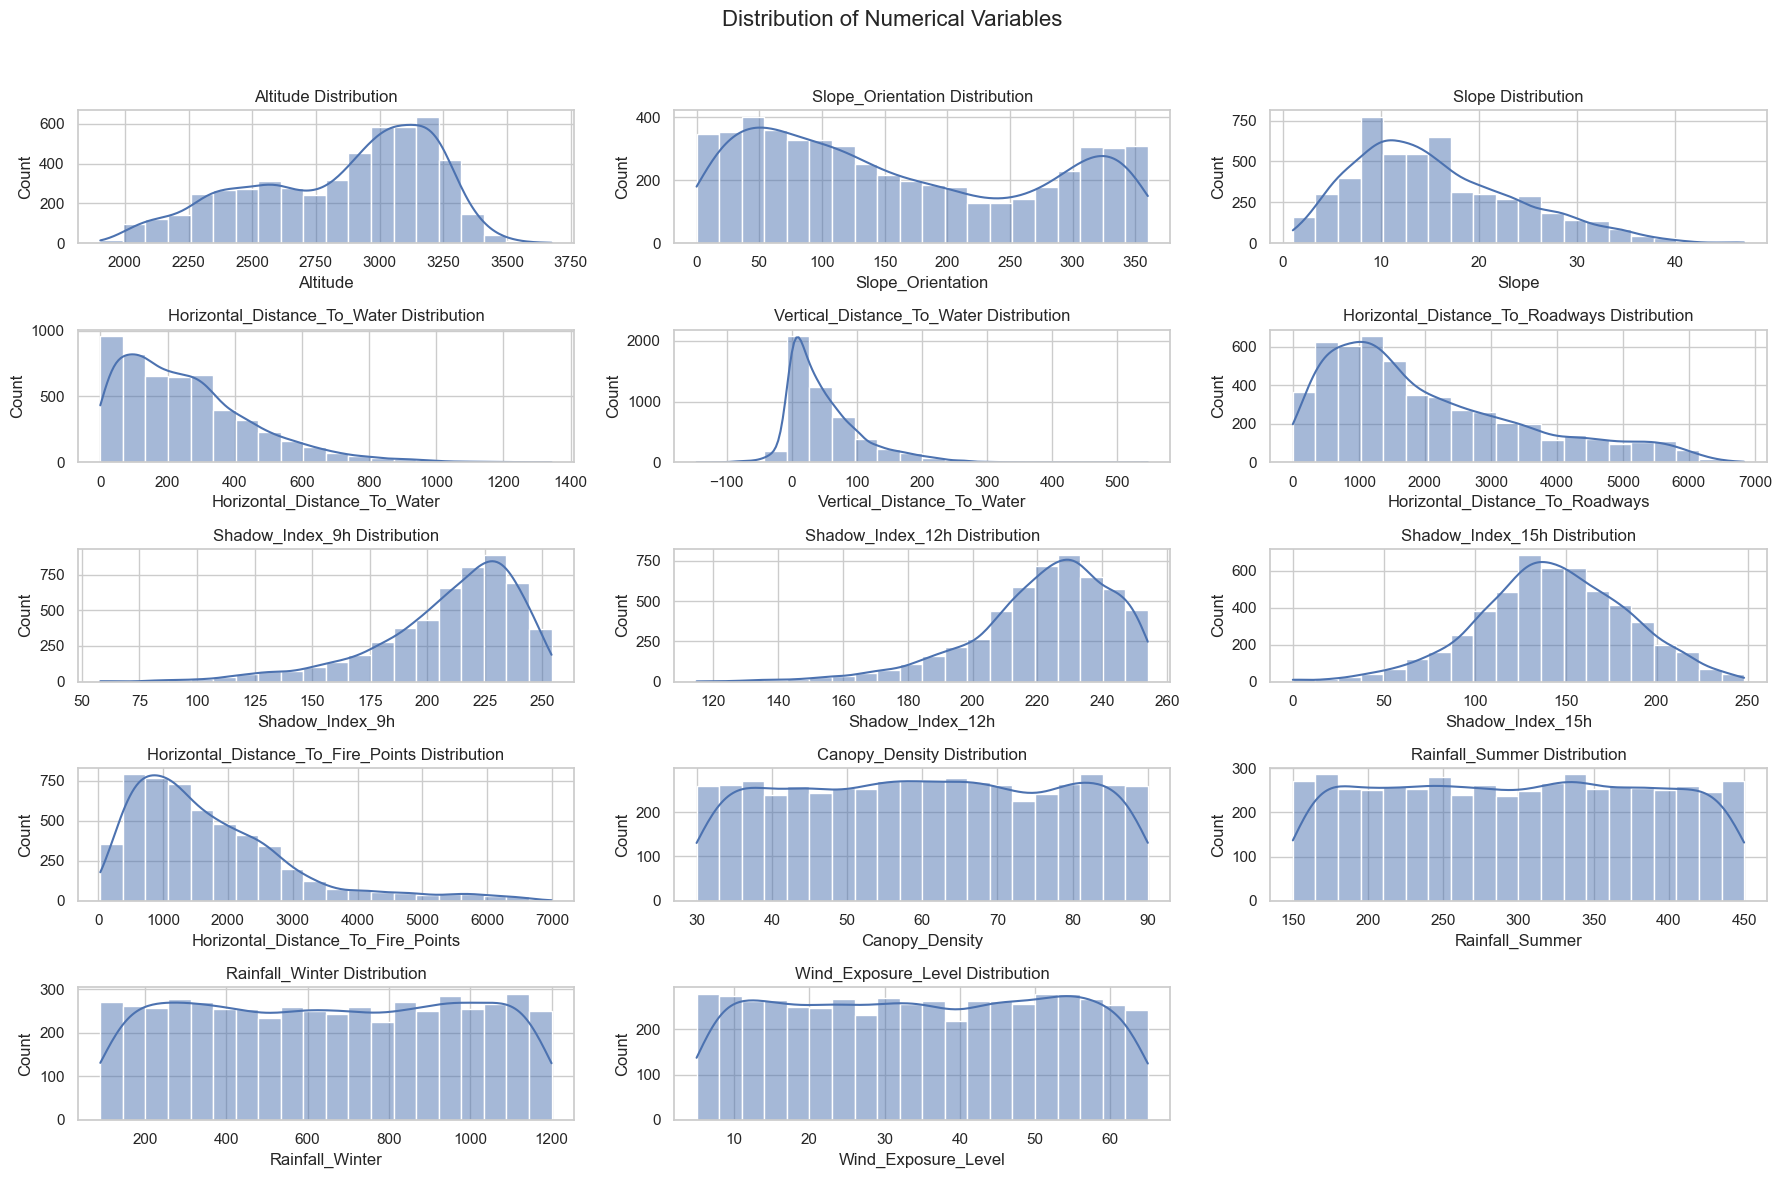

In [7]:
# Set the style for the visualizations
sns.set(style="whitegrid")

# List of numerical columns to plot
numerical_columns = [
    'Altitude', 'Slope_Orientation', 'Slope', 
    'Horizontal_Distance_To_Water', 'Vertical_Distance_To_Water', 
    'Horizontal_Distance_To_Roadways', 'Shadow_Index_9h', 
    'Shadow_Index_12h', 'Shadow_Index_15h', 
    'Horizontal_Distance_To_Fire_Points', 'Canopy_Density', 
    'Rainfall_Summer', 'Rainfall_Winter', 'Wind_Exposure_Level'
]

# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3
rows = num_plots // cols + (num_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16)

# Plot histograms for each numerical feature
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.histplot(df[col], kde=True, bins=20, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} Distribution')

# Hide any unused subplots
for i in range(num_plots, rows * cols):
    fig.delaxes(axes.flat[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Plotting the distributions of the categorical variables using barcharts.

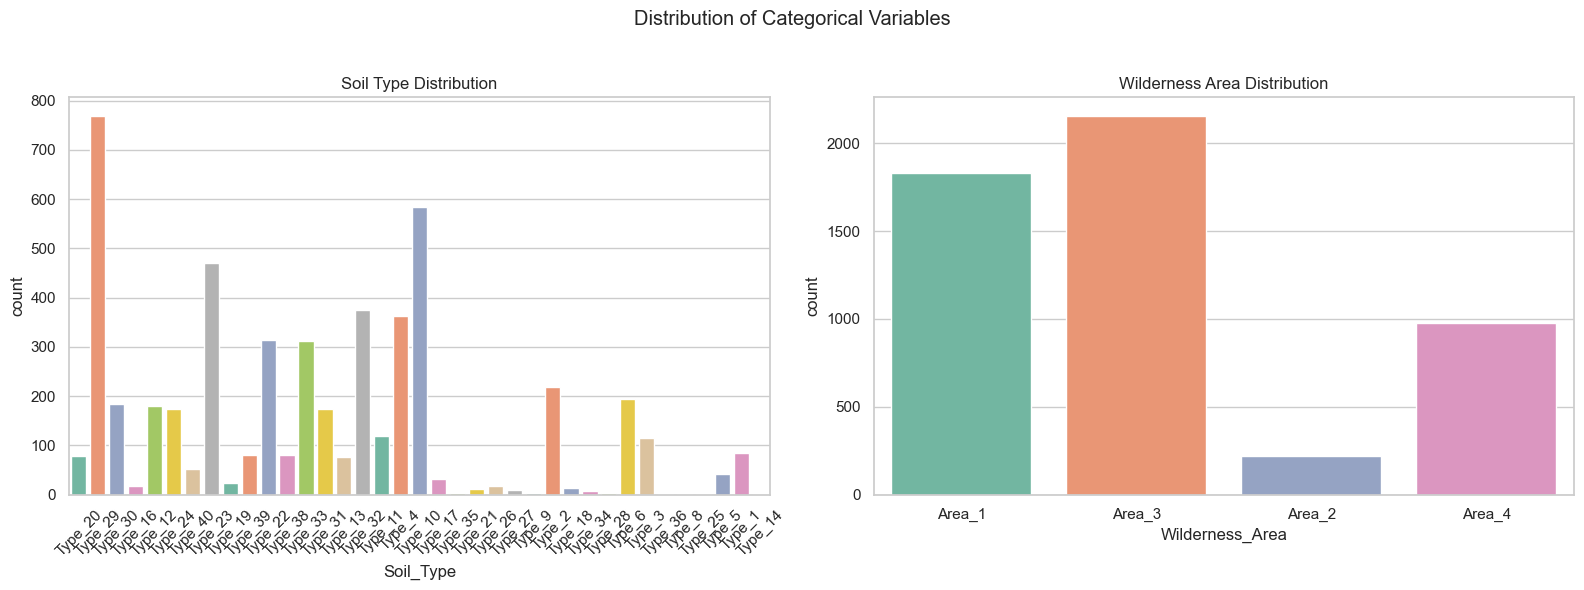

In [8]:
# Plot bar plots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Categorical Variables')

sns.countplot(x='Soil_Type', data=df, ax=axes[0], palette='Set2')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Soil Type Distribution')

sns.countplot(x='Wilderness_Area', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Wilderness Area Distribution')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### Bivariate Analysis

Now we can investigate the relationship between the individual features and the Vegetation Type. First we use box/violin plots of the numerical variables versus the categorical target variable Vegetation Type.s.

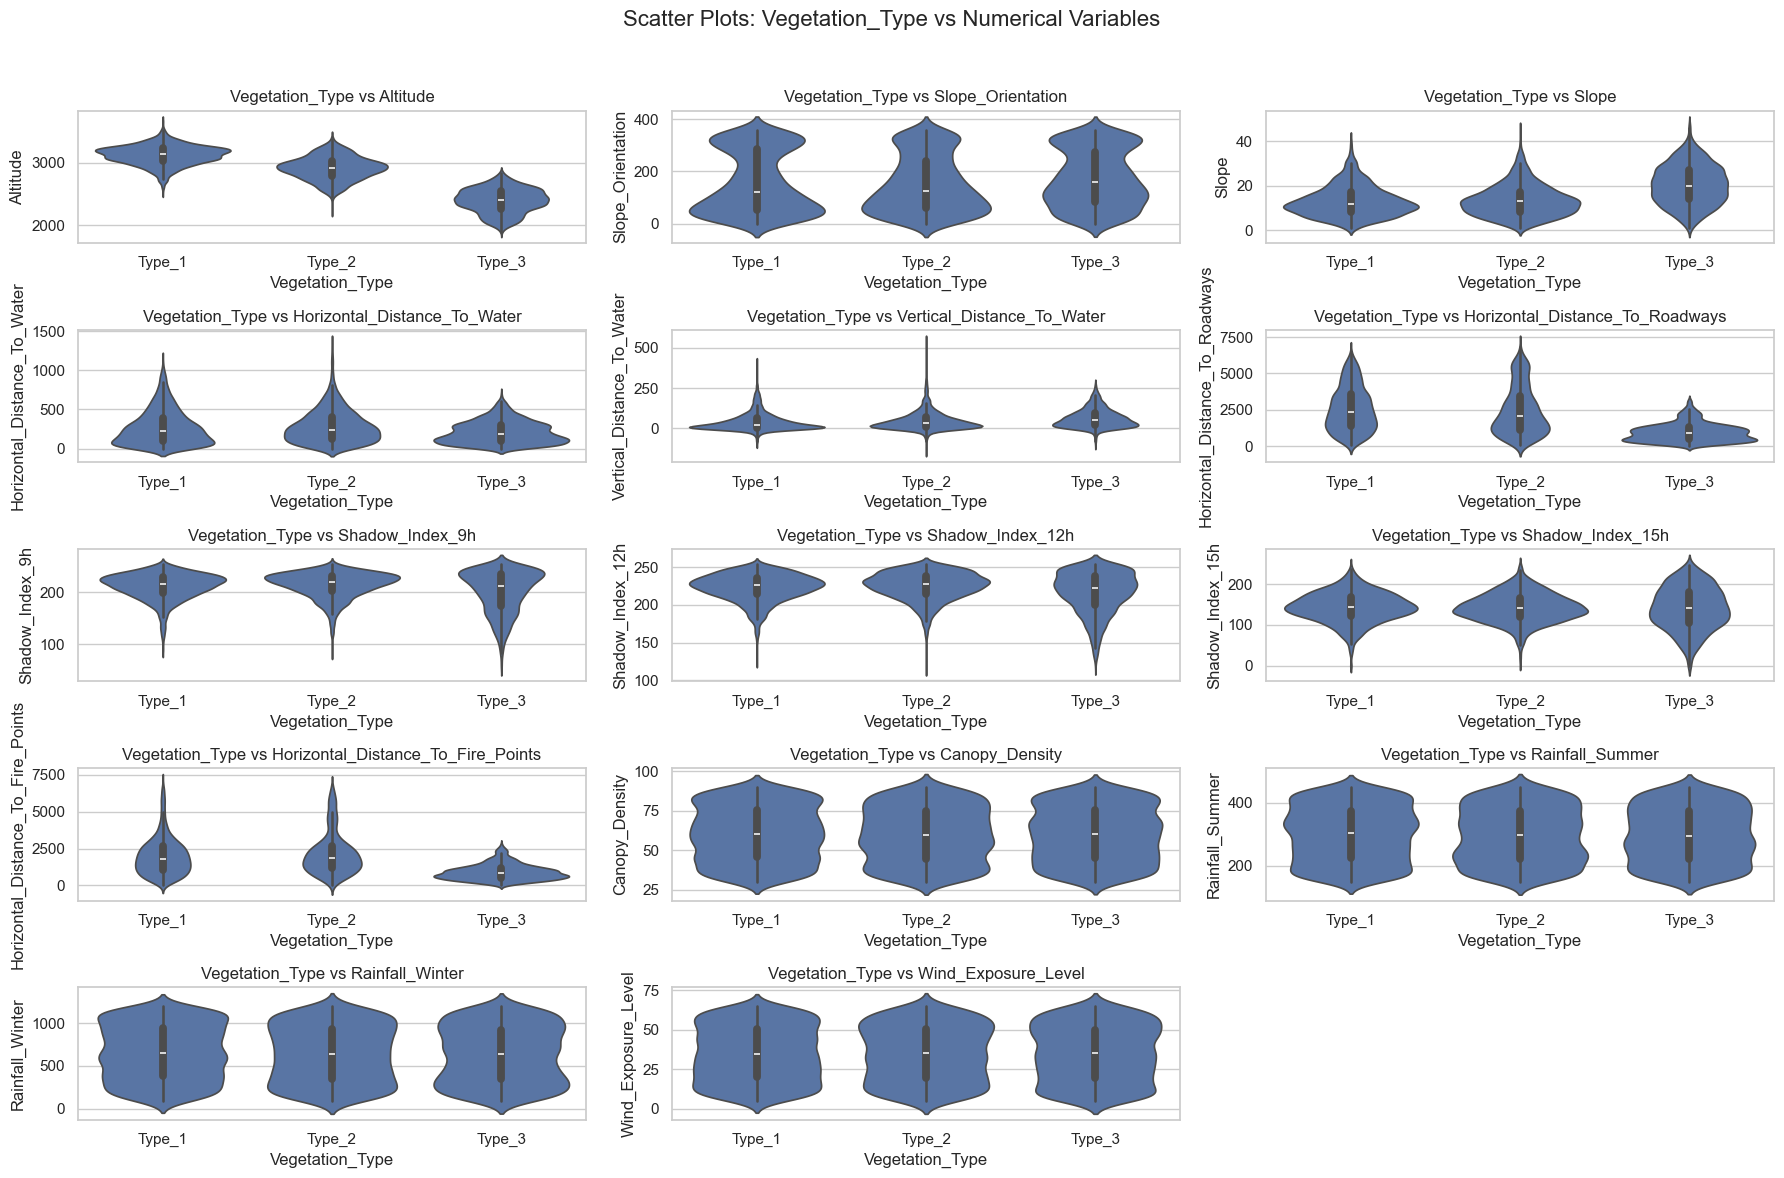

In [9]:
# Set up the subplots, adjusting number of rows and columns to fit all features
num_plots = len(numerical_columns)
cols = 3  # Number of columns in the grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 12))
fig.suptitle('Scatter Plots: Vegetation_Type vs Numerical Variables', fontsize=16)

# Plot scatterplots for each numerical feature against the target variable 'Vegetation_Type'
for i, col in enumerate(numerical_columns):
    row = i // cols
    col_idx = i % cols
    sns.violinplot(x=df['Vegetation_Type'], y=df[col], ax=axes[row, col_idx])  # Vegetation_Type on x-axis
    axes[row, col_idx].set_title(f'Vegetation_Type vs {col}')
    axes[row, col_idx].set_xlabel('Vegetation_Type')  # Set x-axis label
    axes[row, col_idx].set_ylabel(col)  # Set y-axis label

# Hide any unused subplots (in case the grid has extra slots)
if num_plots % cols != 0:  # Only if there are unused subplots
    for j in range(num_plots, rows * cols):
        fig.delaxes(axes.flat[j])

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Categorical variables versus categorical target variable Vegetation Type using stacked bar plots.

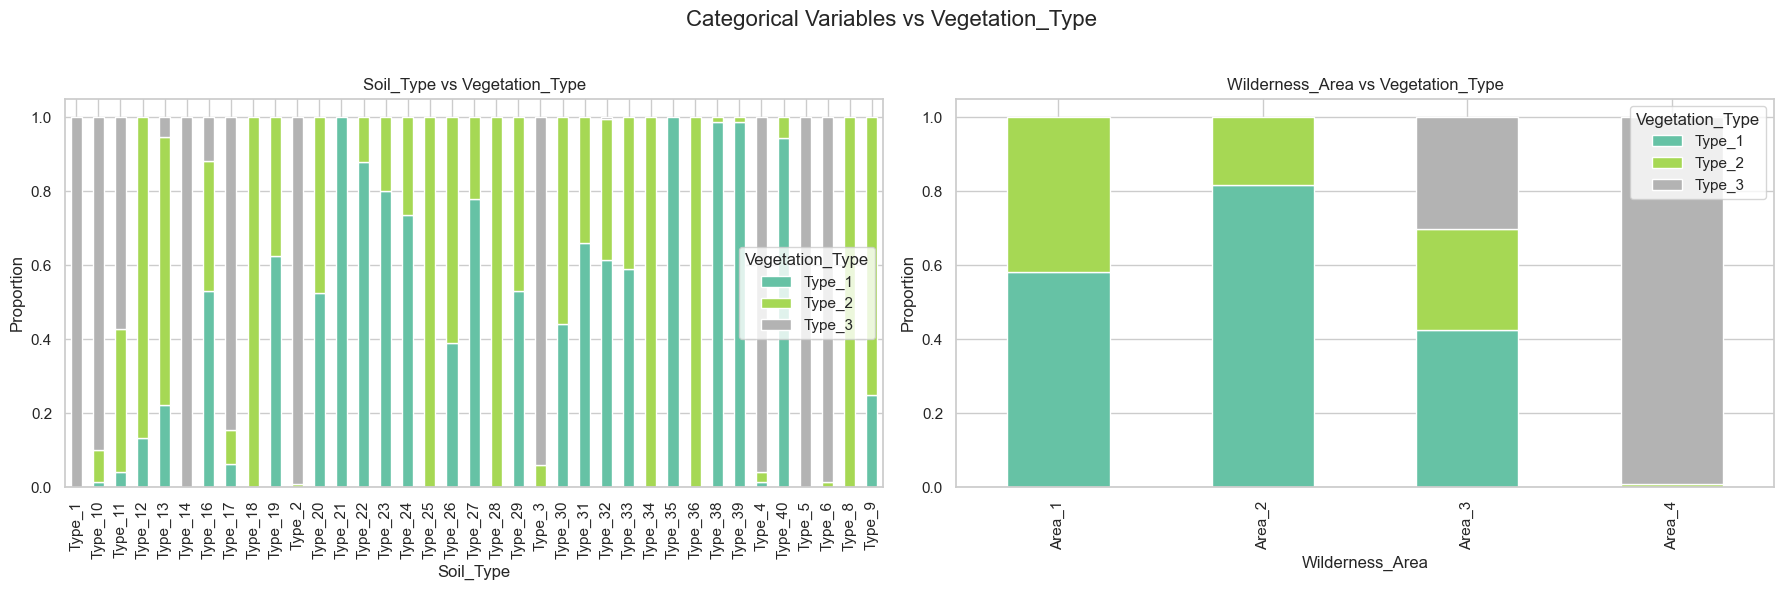

In [10]:
# List the categorical column names
categorical_columns = [
    'Soil_Type', 'Wilderness_Area']

# Set up subplots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(18, 6))
fig.suptitle('Categorical Variables vs Vegetation_Type', fontsize=16)

# Plot stacked bar charts for each categorical feature
for i, col in enumerate(categorical_columns):
    # Create a cross-tabulation of 'Vegetation_Type' against the categorical variable
    crosstab = pd.crosstab(df[col], df['Vegetation_Type'], normalize='index')
    
    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set2')
    axes[i].set_title(f'{col} vs Vegetation_Type')
    axes[i].set_ylabel('Proportion')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Methods

Before the data can be used in the analysis using several methods, the data still needs some preprocessing. First of all, when applying Logistic Regression, Linear Discriminant Analyis or Quadratic Discriminant Analysis, categorical variables should be changed into numerical variables. This can be done using the function factorize where each category can be encoded as a numerical value.

Moreover, before any data analysis, the data must be scaled. Scaling must happen to make sure that no features become more dominant only because they are larger in magnitude. Several methods exist for data scaling such as MinMax Scaling and Standardization. 

In [11]:
# Use factorize to define the categorical non-numerical variable into classes
df['Soil_Type2'] = df.Soil_Type.factorize()[0]
df['Wilderness_Area2'] = df.Wilderness_Area.factorize()[0]
df['Vegetation_Type'] = df.Vegetation_Type.factorize()[0]

Maybe making the categorical variables into dummies is better

In [34]:
df

,Id,Altitude,Slope_Orientation,Slope,Horizontal_Distance_To_Water,Vertical_Distance_To_Water,Horizontal_Distance_To_Roadways,Shadow_Index_9h,Shadow_Index_12h,Shadow_Index_15h,Horizontal_Distance_To_Fire_Points,Canopy_Density,Rainfall_Summer,Rainfall_Winter,Wind_Exposure_Level,Soil_Type,Wilderness_Area,Vegetation_Type,Soil_Type2,Wilderness_Area2
0,41,2699,347,3,0,0,2096,213,234,159,6853,37.32,282.46,125.22,6.23,Type_20,Area_1,0,0,0
1,52,2739,323,25,85,43,3118,149,205,192,6219,76.51,182.57,532.19,30.65,Type_29,Area_1,0,1,0
2,53,2696,72,2,30,0,3271,222,234,149,6071,86.37,374.79,275.52,59.96,Type_30,Area_1,0,2,0
3,56,2722,315,24,30,19,3216,148,212,200,6132,85.31,364.30,1182.48,22.21,Type_16,Area_1,0,3,0
4,68,2919,13,13,90,6,5321,207,214,142,4060,78.13,303.26,1198.69,14.22,Type_29,Area_1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,14996,2464,219,21,42,27,1101,192,254,192,711,69.05,193.92,1093.50,54.32,Type_4,Area_3,2,17,1
5180,2483,2095,306,30,134,60,450,126,208,215,454,86.64,187.25,164.92,60.99,Type_10,Area_4,2,18,3
5181,6692,2545,78,12,153,19,497,235,219,114,959,43.07,218.16,1076.45,49.61,Type_6,Area_4,2,29,3
5182,7351,2576,167,9,268,79,932,227,244,149,1323,49.76,318.67,675.79,56.94,Type_2,Area_3,2,25,1


In [12]:
# Split into features (X) and target (y)
X = df.drop(['Id', 'Soil_Type', 'Wilderness_Area', 'Vegetation_Type'], axis=1)  # independent variables
y = df['Vegetation_Type']  # dependent variable

# Apply scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

#### Code multiple resampling methods

In [13]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score

# Holdout resampling
def holdout(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state) 
    
    return X_train, X_test, y_train, y_test

# k-fold cross-validation
def k_fold_cv(model, X, y, k, random_state=42):

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    
    print(f"Cross-Validation Accuracies: {cv_results}")
    mean_accuracy = cv_results.mean()
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    
    return mean_accuracy

# If the sample is small, you can use LOOCV. Here is the code but the sample is not small so probably we won't use it
def LOOCV(model, X, y):
    # Initialize Leave-One-Out Cross-Validation
    loo = LeaveOneOut()

    # Perform LOOCV
    cv_results = cross_val_score(model, X, y, cv=loo, scoring='accuracy')

    return cv_results

def bootstrap(X, y, n_iterations=10):
    n_samples = X_scaled.shape[0]
    accuracies = []

    # Loop over the number of bootstrap iterations
    for i in range(n_iterations):
        # Create a bootstrap sample
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        X_train, y_train = X.iloc[indices], y.iloc[indices]
        
        # Find the out-of-bag samples (those not in the bootstrap sample)
        out_of_bag = list(set(range(n_samples)) - set(indices))
        X_test, y_test = X.iloc[out_of_bag], y.iloc[out_of_bag]
        
        # Initialize the logistic regression model
        model = LogisticRegression()
        model.fit(X_train, y_train)
        
        # Evaluate on the out-of-bag data
        if len(out_of_bag) > 0:  # Ensure there are out-of-bag samples
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
    
    # Return the list of accuracies from all iterations
    return accuracies


# make ROC curves

#### Logistic Regression

We can use Linear Regression in classification problems. However, LR can result in probabilities for belonging to a certain class of below 0 and above 1. Logistic Regression makes sure that these probabilities are between 0 and 1 using a logistic function. 

In [14]:
# Build the logistic regression model
log_reg = LogisticRegression()

X_train, X_test, y_train, y_test = holdout(X_scaled, y, test_size=0.3)
k_fold_cv(log_reg, X_scaled, y, 5)
#LOOCV(log_reg, X_scaled, y) --> takes very long since dataset is quite big

Cross-Validation Accuracies: [0.82738669 0.80327869 0.82738669 0.83124397 0.81949807]
Mean Accuracy: 0.82


0.8217588231570874

In [15]:
# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 81.81%
Confusion Matrix:
[[560 103   3]
 [129 224  35]
 [  0  13 489]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       666
           1       0.66      0.58      0.62       388
           2       0.93      0.97      0.95       502

    accuracy                           0.82      1556
   macro avg       0.80      0.80      0.80      1556
weighted avg       0.81      0.82      0.81      1556



In [16]:
# make a plot

#### Linear Discriminant Analysis

explain when to use LDA and if this applies

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Build the linear discriminant analysis model
lda = LinearDiscriminantAnalysis()

# Train the model
lda.fit(X_train, y_train)

# Make predictions
y_pred_lda = lda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lda)
conf_matrix = confusion_matrix(y_test, y_pred_lda)
class_report = classification_report(y_test, y_pred_lda)

# Print results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 81.62%
Confusion Matrix:
[[549 113   4]
 [123 232  33]
 [  0  13 489]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       666
           1       0.65      0.60      0.62       388
           2       0.93      0.97      0.95       502

    accuracy                           0.82      1556
   macro avg       0.80      0.80      0.80      1556
weighted avg       0.81      0.82      0.81      1556



In [18]:
# make plots

#### Quadrant Discriminant Analysis

explain when to use QDA and evaluate if this is necessary

In [19]:
# Build the linear discriminant analysis model
qda = QuadraticDiscriminantAnalysis()

# Train the model
qda.fit(X_train, y_train)

# Make predictions
y_pred_qda = qda.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_qda)
conf_matrix = confusion_matrix(y_test, y_pred_qda)
class_report = classification_report(y_test, y_pred_qda)

# Print results
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 80.98%
Confusion Matrix:
[[534 126   6]
 [116 245  27]
 [  0  21 481]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       666
           1       0.62      0.63      0.63       388
           2       0.94      0.96      0.95       502

    accuracy                           0.81      1556
   macro avg       0.79      0.80      0.80      1556
weighted avg       0.81      0.81      0.81      1556



### LDA vs QDA --> check covariance matrices of classes

If the covariance matrices are similar across classes, LDA should work well; if they are different, QDA is likely the better choice.

In [20]:
classes = df['Vegetation_Type'].unique()
df_cov = df.drop(['Id', 'Soil_Type', 'Wilderness_Area'], axis=1)  # independent variables
covariances = {}

for class_value in classes:
    class_data = df_cov[df_cov['Vegetation_Type'] == class_value].drop('Vegetation_Type', axis=1)  # Drop target column
    covariances[class_value] = np.cov(class_data, rowvar=False)

# Output covariance matrices for each class
for class_value, cov_matrix in covariances.items():
    print(f"Covariance matrix for class {class_value}:\n", cov_matrix, "\n")

Covariance matrix for class 0:
 [[ 2.43750118e+04  1.68677075e+03  5.51869727e+01  1.35181263e+04
   2.95825254e+03  1.43693117e+04 -1.25012346e+02  2.73822176e+02
   3.74528633e+02 -2.77301710e+04 -6.52549186e+00  8.92535947e+01
   6.56354333e+02 -3.59347804e+01  1.57337809e+02  1.41157206e+01]
 [ 1.68677075e+03  1.37547147e+04  2.60055230e+01  1.23911573e+02
   1.90698581e+02  1.38634439e+03 -1.75248632e+03  7.52513729e+02
   2.83768698e+03 -2.19875527e+04 -1.82565841e+01 -4.35911248e+02
  -1.51636137e+03 -7.11202890e+01  6.41039334e+01  1.16156916e+01]
 [ 5.51869727e+01  2.60055230e+01  4.64735697e+01  1.49034364e+02
   1.10229420e+02 -1.52809849e+03 -5.47130282e+01 -7.37441691e+01
  -4.79509221e+01  1.06138198e+01  2.15931938e+00  1.16611647e+01
   2.50628724e+01 -6.57209571e-01 -2.08029266e-01  3.64298458e-01]
 [ 1.35181263e+04  1.23911573e+02  1.49034364e+02  4.89520018e+04
   8.09491825e+03 -9.46467645e+03 -2.96192934e+02 -2.16200314e+02
   3.52857564e+01  6.85656248e+03  4.9360

#### Feature selection using regularization methods

Removing features can improve understandability and performance of the model. Feature selection can be done automatically Ridge or Lasso Regression. When coefficients of variables become 0 or increasingly small, these features can be removed from the classification model to improve model interpretability and performance.

In [21]:
# Define the Ridge regression model
ridge = Ridge()

# Set up a grid of alpha values to try
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # You can adjust this range

# Set up GridSearchCV to tune alpha
grid_search = GridSearchCV(ridge, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model (best alpha)
best_ridge = grid_search.best_estimator_
print(f"Best alpha value: {grid_search.best_params_['alpha']}")

# Predict on the test set using the best model
y_pred = best_ridge.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best alpha: {mse}")

# Print the coefficients along with the corresponding feature names
coefficients = best_ridge.coef_
feature_names = X.columns

# Combine the feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Ridge Coefficient': coefficients})

# Display the coefficients
print("\nRidge Coefficients with best alpha:")
print(coeff_df)

Best alpha value: 0.1
Mean Squared Error with best alpha: 0.17221694535870494

Ridge Coefficients with best alpha:
                               Feature  Ridge Coefficient
0                             Altitude          -3.460068
1                    Slope_Orientation          -0.037127
2                                Slope           0.552286
3         Horizontal_Distance_To_Water           0.564216
4           Vertical_Distance_To_Water           0.400909
5      Horizontal_Distance_To_Roadways           0.130902
6                      Shadow_Index_9h           0.978743
7                     Shadow_Index_12h           0.394006
8                     Shadow_Index_15h           0.644714
9   Horizontal_Distance_To_Fire_Points          -0.148050
10                      Canopy_Density          -0.034968
11                     Rainfall_Summer          -0.037449
12                     Rainfall_Winter          -0.001275
13                 Wind_Exposure_Level           0.010886
14             

In [22]:
# Define the Lasso regression model
lasso = Lasso()

# Set up a grid of alpha values to try
alpha_values = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # You can adjust this range

# Set up GridSearchCV to tune alpha
grid_search = GridSearchCV(lasso, param_grid=alpha_values, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best model (best alpha)
best_lasso = grid_search.best_estimator_
print(f"Best alpha value: {grid_search.best_params_['alpha']}")

# Predict on the test set using the best model
y_pred = best_lasso.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with best alpha: {mse}")

# Print the coefficients along with the corresponding feature names
coefficients = best_lasso.coef_
feature_names = X.columns

# Combine the feature names and their corresponding coefficients
coeff_df = pd.DataFrame({'Feature': feature_names, 'Lasso Coefficient': coefficients})

# Display the coefficients
print("\nLasso Coefficients with best alpha:")
print(coeff_df)

Best alpha value: 0.001
Mean Squared Error with best alpha: 0.1726294654021468

Lasso Coefficients with best alpha:
                               Feature  Lasso Coefficient
0                             Altitude          -3.383602
1                    Slope_Orientation          -0.020662
2                                Slope           0.346189
3         Horizontal_Distance_To_Water           0.543542
4           Vertical_Distance_To_Water           0.254648
5      Horizontal_Distance_To_Roadways           0.086322
6                      Shadow_Index_9h           0.303993
7                     Shadow_Index_12h           0.640992
8                     Shadow_Index_15h          -0.000000
9   Horizontal_Distance_To_Fire_Points          -0.097353
10                      Canopy_Density          -0.023281
11                     Rainfall_Summer          -0.025259
12                     Rainfall_Winter          -0.000000
13                 Wind_Exposure_Level           0.000214
14            

In [23]:
# try ridge regression with multiple alphas, make a plot of the coefficients and the L2 norm
# make plot of bias-variance trade-off and use CV for selecting alpha
lambdas = 10**np.linspace(10, -2, 100)*0.5

ridge = Ridge()
coefs = []

for l in lambdas:
    ridge.set_params(alpha = l)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)

np.shape(coefs)

(100, 16)

Text(0, 0.5, 'weights')

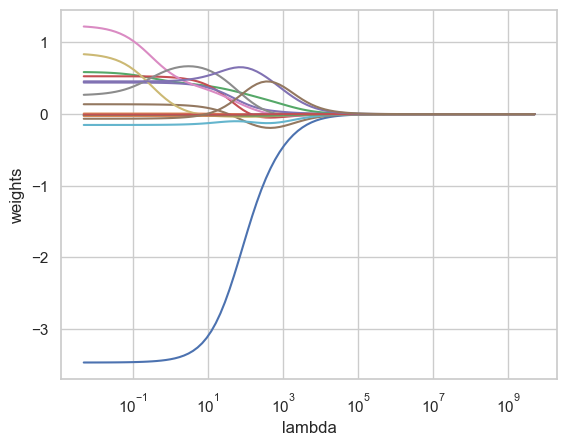

In [24]:
# Plot the coefficients as they change over values of lambda
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [25]:
ridge2 = Ridge(alpha = 0.0000001)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
print(pd.Series(ridge2.coef_))
print(mean_squared_error(y_test, pred2))

0    -3.467864
1    -0.037502
2     0.610404
3     0.565882
4     0.401719
5     0.132397
6     1.271275
7     0.227176
8     0.951072
9    -0.148645
10   -0.034992
11   -0.037903
12   -0.001389
13    0.010929
14    0.439316
15   -0.081380
dtype: float64
0.17223167006530898


In [26]:
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.18824679033962358

In [27]:
ridge4 = Ridge(alpha = ridgecv.alpha_)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

0.17221961966534846

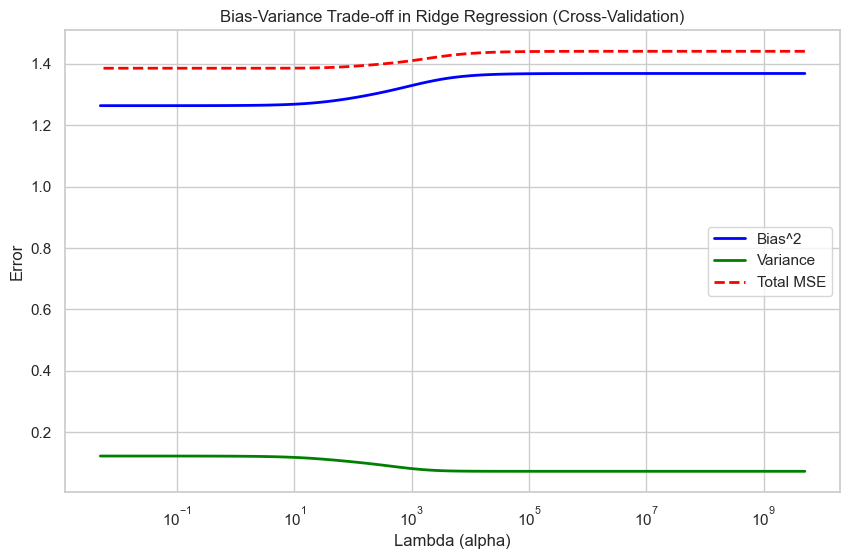

In [28]:
# make a bias-variance trade-off plot
bias_sq = []
variance = []
mse = []

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for l in lambdas:
    y_preds = np.zeros((X_scaled.shape[0], n_splits))

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X_scaled)):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        ridge.set_params(alpha = l)
        ridge.fit(X_train, y_train)

        y_preds[test_idx, fold_idx] = ridge.predict(X_test).flatten()

    avg_preds = np.mean(y_preds, axis=1)
    bias_sq.append(np.mean((avg_preds - y.to_numpy().flatten())**2))
    variance.append(np.mean(np.var(y_preds, axis=1)))
    mse.append(bias_sq[-1] + variance[-1])

plt.figure(figsize=(10, 6))
plt.plot(lambdas, bias_sq, label="Bias^2", color="blue", linewidth=2)
plt.plot(lambdas, variance, label="Variance", color="green", linewidth=2)
plt.plot(lambdas, mse, label="Total MSE", color="red", linestyle='--', linewidth=2)
plt.xscale('log')  # Use log scale for lambda
plt.xlabel("Lambda (alpha)")
plt.ylabel("Error")
plt.title("Bias-Variance Trade-off in Ridge Regression (Cross-Validation)")
plt.legend()
plt.show()


Text(0, 0.5, 'weights')

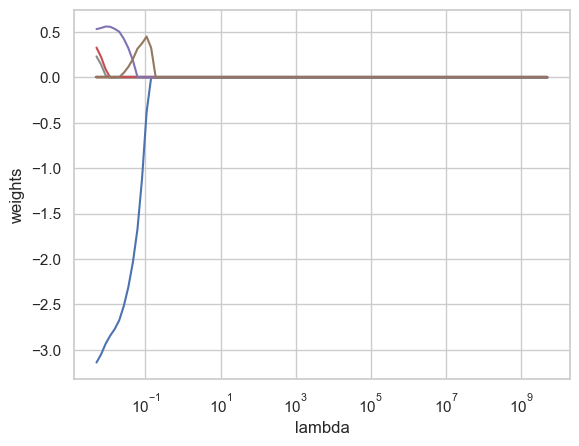

In [31]:
lasso = Lasso(max_iter = 10000)
coefs_lasso = []

for l in lambdas:
    lasso.set_params(alpha = l)
    lasso.fit(X_scaled, y)
    coefs_lasso.append(lasso.coef_)

# Plot the coefficients as they change over values of lambda
ax = plt.gca()
ax.plot(lambdas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')

In [32]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.17818741306773353

In [33]:
pd.Series(lasso.coef_, index=X.columns) 

Altitude                             -3.461813
Slope_Orientation                     0.019262
Slope                                 0.376633
Horizontal_Distance_To_Water          0.540843
Vertical_Distance_To_Water            0.389149
Horizontal_Distance_To_Roadways       0.131641
Shadow_Index_9h                       0.448285
Shadow_Index_12h                      0.703589
Shadow_Index_15h                     -0.000000
Horizontal_Distance_To_Fire_Points   -0.159749
Canopy_Density                       -0.016715
Rainfall_Summer                      -0.019473
Rainfall_Winter                      -0.004543
Wind_Exposure_Level                  -0.007476
Soil_Type2                            0.450448
Wilderness_Area2                     -0.047740
dtype: float64